# Credit Risk Analysis Project - Nitesh Dabas

## Context

The dataset contains 1000 entries with 20 categorial/symbolic attributes. Each entry in this dataset represents a person who takes a credit by a bank. Each person can be classified as good or bad credit risk candidate according to the set of attributes. Goal is to predict credit risk associated with each person.

In [43]:
#Load the libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
#Load the data and take a copy for eda
data_original = pd.read_csv("./Data/german_credit_data.csv", sep=",", index_col=0)
data = data_original
data.shape

(1000, 10)

In [45]:
#Check first 10 rows of dataset
data.head(n=10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [46]:
# Get a summary about dataset
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [47]:
#Lets first rename the columns of interest as column names in dataset aren't very appropriate syntactically.
data = data.rename(columns={"Credit amount":"credit_amount", "Checking account":"checking_account", 
                            "Saving accounts":"saving_accounts"})
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'saving_accounts', 'checking_account',
       'credit_amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

## Exploratory Data Analysis

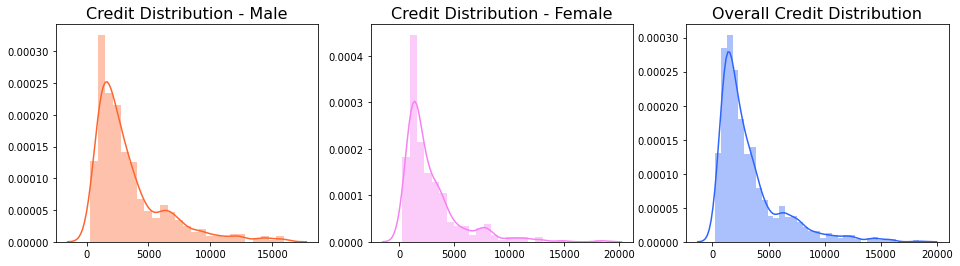

In [48]:
# Plotting credit amount distribution as per gender
credit_amount_male = data["credit_amount"].loc[data["Sex"]=="male"].values
credit_amount_female = data["credit_amount"].loc[data["Sex"]=="female"].values
credit_amount_overall = data["credit_amount"].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))
sns.distplot(credit_amount_male, ax=ax[0], color="#FE642E")
ax[0].set_title("Credit Distribution - Male", fontsize=16)
sns.distplot(credit_amount_female, ax=ax[1], color="#F781F3")
ax[1].set_title("Credit Distribution - Female", fontsize=16)
sns.distplot(credit_amount_overall, ax=ax[2], color="#2E64FE")
ax[2].set_title("Overall Credit Distribution", fontsize=16)
plt.savefig('Plot for Credit Amount distribution as per Gender')
plt.show()

### Male candidates seems to have availed more credit loan than female candidates. This is also evident from below:

In [49]:
data["Sex"].value_counts()

male      690
female    310
Name: Sex, dtype: int64

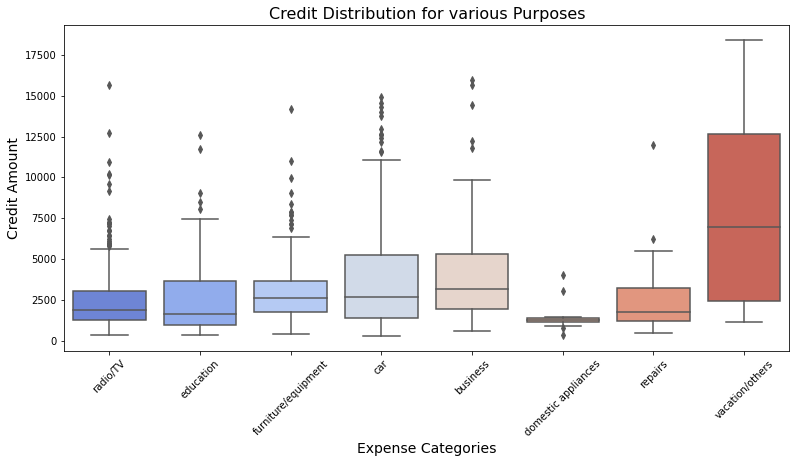

In [50]:
#Plotting credit amount distribution with respect to purposes

plt.figure(figsize=(13,6))
boxplot = sns.boxplot(x='Purpose', y='credit_amount', data=data, palette="coolwarm")
boxplot.set_title("Credit Distribution for various Purposes", fontsize=16)
boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation=45)
boxplot.set_xlabel('Expense Categories', fontsize=14)
boxplot.set_ylabel('Credit Amount', fontsize=14) 
plt.savefig('Plot for Credit Amount Distribution with respect to Purposes')
plt.show()

### Seems as though a significant number of loans had been taken for vacation/others purposes

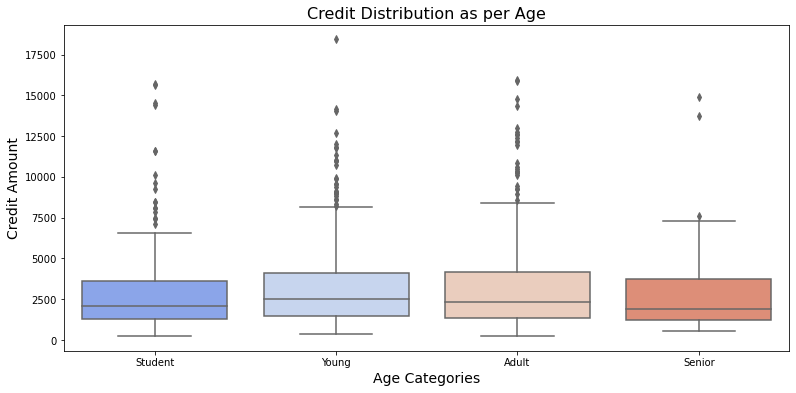

In [51]:
#Plotting credit amount distribution for different age groups

#Lets devide age groups as : 
#    18 - 25    =>    Student
#    26 - 35    =>    Young
#    36 - 60    =>    Adult
#    60 - all   =>    Senior

age_interval = (18, 25, 35, 60, 120)
age_categories = ['Student', 'Young', 'Adult', 'Senior']
data["age_category"] = pd.cut(data.Age, age_interval, labels=age_categories)

plt.figure(figsize=(13,6))
boxplot = sns.boxplot(x=data["age_category"], y=data["credit_amount"], data=data, palette="coolwarm")
boxplot.set_title("Credit Distribution as per Age", fontsize=16)
boxplot.set_xticklabels(boxplot.get_xticklabels())
boxplot.set_xlabel('Age Categories', fontsize=14)
boxplot.set_ylabel('Credit Amount', fontsize=14)
plt.savefig('Plot for Credit Distribution as per Age')
plt.show()

### Young people aged between 26-35 seems to have taken more credit loans followed by Adults with age categories 36-60 followed by Seniors and Students.

In [52]:
#It would also be interesting to know the purpose of having credit loans for each gender (in percentage terms)

data["Purpose"].unique()
loan_purpose = pd.crosstab(data['Purpose'], data['Sex']).apply(lambda x: x/x.sum() * 100)
loan_purpose

Sex,female,male
Purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


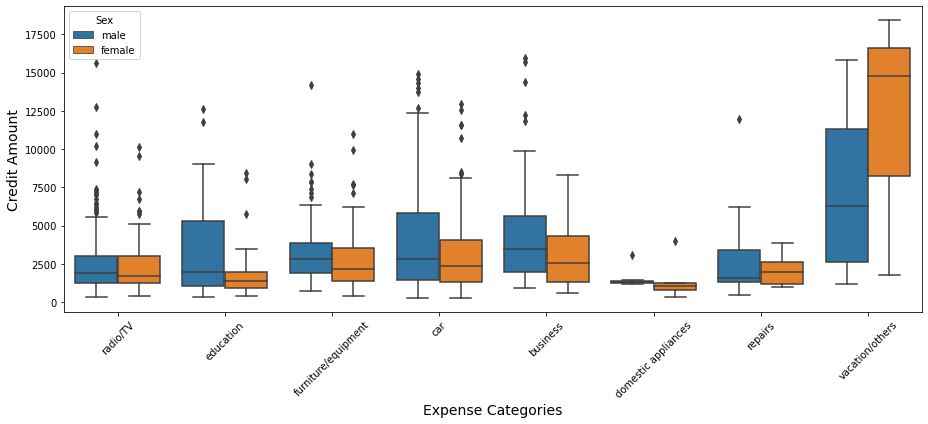

In [53]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(13,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=data)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    box.set_xlabel('Expense Categories', fontsize=14)
    box.set_ylabel('Credit Amount', fontsize=14) 
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()
    plt.savefig('Credit Loan Purpose for each gender')
boxes("Purpose","credit_amount","Sex")

### Clearly, A significant number of Male and Female love to spend their loaned spend on vacations, Females spend more than Men while on vacation.
### Men spend the credit amount more on Education, Car and Business purposes than their Female counterparts.
### Both genders spend almost equal on radio/TV.

In [54]:
# Lets also evaluate number of jobs each Gender as been doing amoung people who have taken credit(loan) from bank. 
# (figures in percentage terms)
number_of_jobs = pd.crosstab(data["Job"], data["Sex"]).apply(lambda x: x/x.sum() * 100)
number_of_jobs

Sex,female,male
Job,,
0,3.870968,1.449275
1,20.645161,19.710145
2,63.548387,62.753623
3,11.935484,16.086957


### Both males and females seems to be doing comparable number of jobs. Not much difference there.

In [56]:
#Let us now analyze credit risk(Risk) as per customer wealth(checking account status)
data["checking_account"].unique() #ignore the missing values from checking_account column
segregated_data = pd.crosstab(data['Risk'], data['checking_account']).apply(lambda x: x/x.sum() * 100)
segregated_data = segregated_data.round(pd.Series([2,2,2], index=['little', 'moderate', 'rich']))
segregated_data

checking_account,little,moderate,rich
Risk,,,
bad,49.27,39.03,22.22
good,50.73,60.97,77.78


In [58]:
from plotly import tools
from plotly.offline import iplot
import plotly.graph_objs as pygo
bad_little = segregated_data['little'][0]
good_little = segregated_data['little'][1]
bad_moderate = segregated_data['moderate'][0]
good_moderate = segregated_data['moderate'][1]
bad_rich = segregated_data['rich'][0]
good_rich = segregated_data['rich'][1]

little = pygo.Bar(x=['Bad Risk', 'Good Risk'], y=[bad_little, good_little], name="Little Wealth", text='%',
                  marker=dict(color='#1f77b4', line=dict( color='#1f77b4', width=1.5),),)
moderate = pygo.Bar(x=['Bad Risk', 'Good Risk'], y=[bad_moderate, good_moderate], name="Moderate Wealth", text='%',
                    xaxis='x2', yaxis='y2', marker=dict( color='#17becf', line=dict( color='#CD8000', width=1.5),),)
rich = pygo.Bar(x=['Bad Risk', 'Good Risk'], y=[bad_rich, good_rich], name="High Wealth", text="%", 
              marker=dict( color='#8c564b', line=dict( color='#8c564b', width=1.5),), xaxis='x3', yaxis='y3')

plt.figure(figsize=(13,6))
fig = py.subplots.make_subplots(rows=1, cols=3, subplot_titles=('Little Wealth', 'Moderate Wealth', 'High Wealth'))
fig.append_trace(little, 1, 1)
fig.append_trace(moderate, 1, 2)
fig.append_trace(rich, 1, 3)
fig['layout'].update(height=400, width=800, title='Levels of Risk by Wealth')
iplot(fig, filename='make-subplots-multiple-with-titles')

<Figure size 936x432 with 0 Axes>

### Individuals belonging to the "little wealth" group had a higher probability of being bad risk loans. The higher the wealth, lower  is probability of being a bad risk loan.

In [15]:
data['Risk_int'] = np.nan
list = [data]
for iColumn in list:
    iColumn.loc[data['Risk'] == 'bad', 'Risk_int'] = 0 
    iColumn.loc[data['Risk'] == 'good', 'Risk_int'] = 1
    
    
data['Risk_int'] = data['Risk_int'].astype(int)
data.head()

,Age,Sex,Job,Housing,saving_accounts,checking_account,credit_amount,Duration,Purpose,Risk,age_category,Risk_int
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Senior,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student,0
2,49,male,1,own,little,NaN,2096,12,education,good,Adult,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult,1
4,53,male,2,free,little,little,4870,24,car,bad,Adult,0


We now look at correlation between various variables in dataset.

In [16]:
import plotly as py
import plotly.figure_factory as ff

corr = data.corr()
array_corr = corr.values
array_corr = np.around(array_corr, decimals=2)
columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(array_corr, x=columns, y=columns, colorscale='blues')
iplot(fig, filename='annotated_heatmap')

### Clearly there exists a strong correlation between Credit Amount and Duration Variables in the dataset. Which indicates, Higher the credit amount, higher the duration will be to repay it back to bank. 

## Data Preprocessing

In [17]:
#Checking columns with missing values in the dataset
data_original.isnull().sum().sort_values(ascending=False)
data_original

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [18]:
#We will drop the columns with missing values before proceeding to test out models on data
data_original.drop(['Checking account', 'Saving accounts'], axis=1, inplace=True)
newdata = data_original

In [19]:
#One-hot-encoding for categorical variables
newdata_dummy = pd.get_dummies(newdata, drop_first = True)
newdata_dummy.head()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,67,2,1169,6,1,1,0,0,0,0,0,1,0,0,1
1,22,2,5951,48,0,1,0,0,0,0,0,1,0,0,0
2,49,1,2096,12,1,1,0,0,0,1,0,0,0,0,1
3,45,2,7882,42,1,0,0,0,0,0,1,0,0,0,1
4,53,2,4870,24,1,0,0,1,0,0,0,0,0,0,0


## Fitting a Model to data

In [20]:
#Creating the X and y variables
X = newdata_dummy.drop('Risk_good',axis=1)
y = newdata_dummy['Risk_good']

In [21]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

In [23]:
LogReg=LogisticRegression(solver = 'lbfgs', max_iter = 1000)
LogReg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [24]:
y_pred_LogReg = LogReg.predict(X_test)
print(accuracy_score(y_test, y_pred_LogReg))
print(confusion_matrix(y_test, y_pred_LogReg))
print(classification_report(y_test, y_pred_LogReg))

0.708
[[ 13  59]
 [ 14 164]]
              precision    recall  f1-score   support

           0       0.48      0.18      0.26        72
           1       0.74      0.92      0.82       178

    accuracy                           0.71       250
   macro avg       0.61      0.55      0.54       250
weighted avg       0.66      0.71      0.66       250



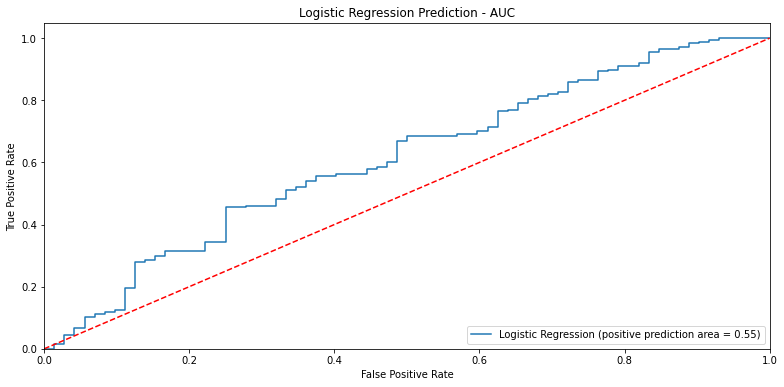

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_LogReg)
fpr, tpr, thresholds = roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,6))
plt.plot(fpr, tpr, label='Logistic Regression (positive prediction area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Prediction - AUC')
plt.legend(loc="lower right")
plt.savefig('LogisticRegression_ROC')
plt.show()

### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier(max_depth=40)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=40)

In [28]:
y_pred__dt = dt.predict(X_test)
print(accuracy_score(y_test, y_pred__dt))
print(confusion_matrix(y_test, y_pred__dt))
print(classification_report(y_test, y_pred__dt))

0.588
[[ 24  48]
 [ 55 123]]
              precision    recall  f1-score   support

           0       0.30      0.33      0.32        72
           1       0.72      0.69      0.70       178

    accuracy                           0.59       250
   macro avg       0.51      0.51      0.51       250
weighted avg       0.60      0.59      0.59       250



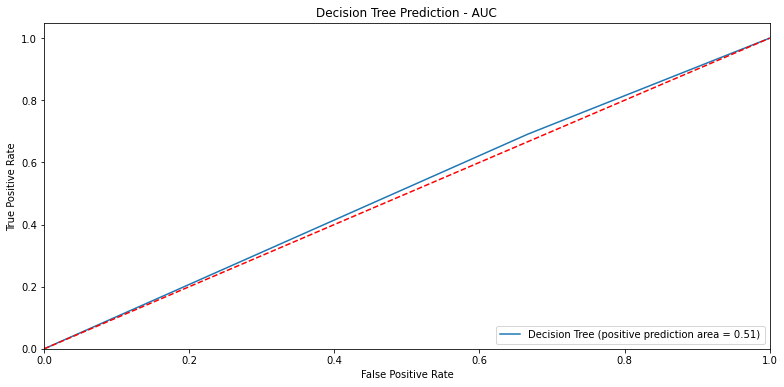

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, y_pred__dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,6))
plt.plot(fpr, tpr, label='Decision Tree (positive prediction area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Prediction - AUC')
plt.legend(loc="lower right")
plt.savefig('DecisionTree_ROC')
plt.show()

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
parameters = {"max_depth": [3, 5, 7, 11, 15, None],
              "max_features": [2, 3, 4, 5, 6, 8, 10]}
rclf = RandomForestClassifier(random_state=42)
rgclf = GridSearchCV(rclf, param_grid = parameters, cv = 10)

In [32]:
rgclf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 11, 15, None],
                         'max_features': [2, 3, 4, 5, 6, 8, 10]})

In [33]:
print(rgclf.best_score_)
print(rgclf.best_params_)

0.728
{'max_depth': 7, 'max_features': 8}


In [34]:
rf = RandomForestClassifier(max_depth= 7, max_features= 8)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=8)

In [35]:
y_pred_rf = rf.predict(X_test)
print (accuracy_score(y_test, y_pred_rf))
print (confusion_matrix(y_test, y_pred_rf))
print (classification_report(y_test, y_pred_rf))

0.704
[[ 12  60]
 [ 14 164]]
              precision    recall  f1-score   support

           0       0.46      0.17      0.24        72
           1       0.73      0.92      0.82       178

    accuracy                           0.70       250
   macro avg       0.60      0.54      0.53       250
weighted avg       0.65      0.70      0.65       250



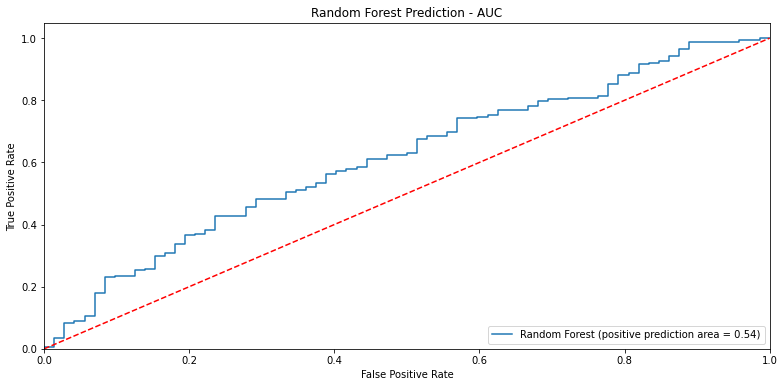

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,6))
plt.plot(fpr, tpr, label='Random Forest (positive prediction area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Prediction - AUC')
plt.legend(loc="lower right")
plt.savefig('RandomForest_ROC')
plt.show()

### Support Vector Machine

In [37]:
from sklearn.svm import SVC
param_grid = {'C': [0.75, 0.85, 0.95, 1],
              'kernel': ['rbf'],
              'degree': [3, 4, 5]
             }
svc = SVC(random_state=42)
svc_grid_search = GridSearchCV(svc, param_grid)

In [38]:
svc_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['rbf']})

In [39]:
print(svc_grid_search.best_estimator_)
print(svc_grid_search.best_params_)

SVC(C=0.75, random_state=42)
{'C': 0.75, 'degree': 3, 'kernel': 'rbf'}


In [40]:
svc_clf = svc_grid_search.best_estimator_
svc_clf.fit(X_train,y_train)

SVC(C=0.75, random_state=42)

In [41]:
y_pred_svc = svc_clf.predict(X_test)
print (accuracy_score(y_test, y_pred_rf))
print (confusion_matrix(y_test, y_pred_rf))
print (classification_report(y_test, y_pred_rf))

0.704
[[ 12  60]
 [ 14 164]]
              precision    recall  f1-score   support

           0       0.46      0.17      0.24        72
           1       0.73      0.92      0.82       178

    accuracy                           0.70       250
   macro avg       0.60      0.54      0.53       250
weighted avg       0.65      0.70      0.65       250



# Logistic regression best predicts the Credit Risk associated to each bank customer.